### Logistic Regression with Python

We'll be trying to predict a classification- survival or deceased.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

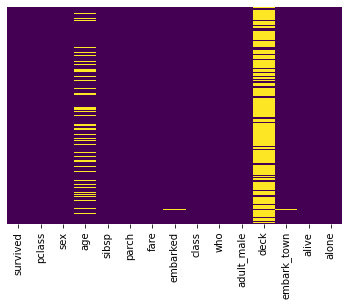

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Observations :-
Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<AxesSubplot:xlabel='survived', ylabel='count'>

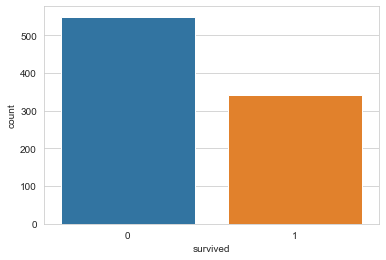

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

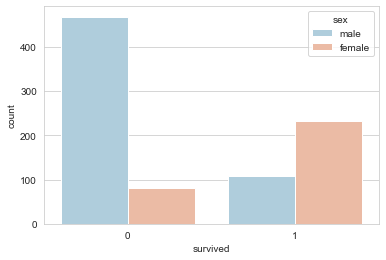

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

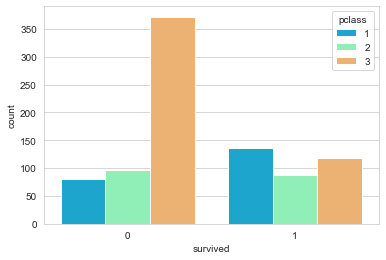

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

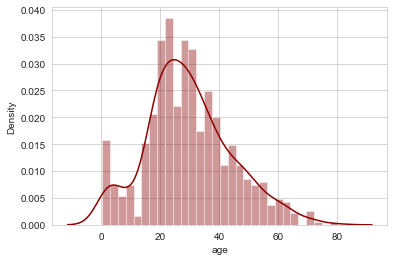

In [9]:
sns.distplot(df['age'].dropna(),kde=True,color='darkred',bins=30)

<AxesSubplot:>

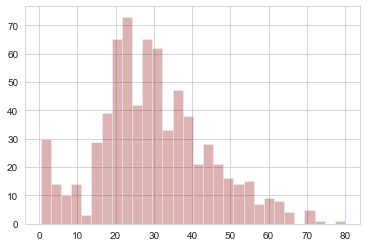

In [10]:
df['age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

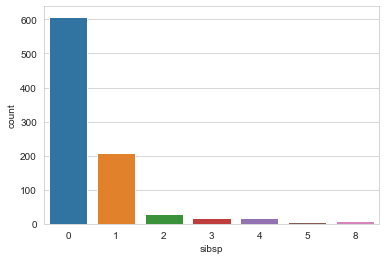

In [11]:
sns.countplot(x='sibsp',data=df)

<AxesSubplot:>

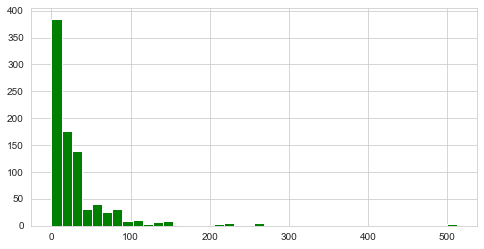

In [12]:
df['fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='pclass', ylabel='age'>

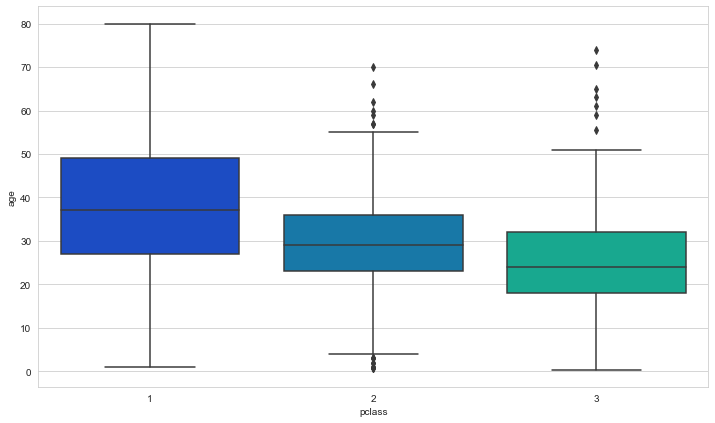

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=df,palette='winter')

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [15]:
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)

In [16]:
df.drop(columns=["deck"],inplace=True)

<AxesSubplot:>

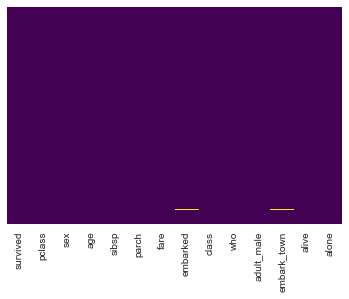

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [19]:
mode=df["embark_town"].mode()[0]
df['embark_town'].fillna(mode,inplace=True)

In [20]:
df["embark_town"].isnull().sum()

0

In [21]:
sex = pd.get_dummies(df['sex'],drop_first=True)
embark = pd.get_dummies(df['embarked'],drop_first=True)
embark_town = pd.get_dummies(df['embark_town'],drop_first=True)

In [22]:
df.drop(["who","adult_male"],axis=1,inplace=True)

In [23]:
df.drop(["sex","embarked"],axis=1,inplace=True)

In [24]:
df.drop(["embark_town"],axis=1,inplace=True)

In [25]:
df.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
class       0
alive       0
alone       0
dtype: int64

In [26]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [27]:
dt={'First':1, 'Second':2, 'Third':3}
df['class']=df['class'].map(dt)

In [28]:
dt1={'no':0, 'yes':1}
dt2={False:0,  True:1}

In [29]:
df

,survived,pclass,age,sibsp,parch,fare,class,alive,alone
0,0,3,22.0,1,0,7.2500,3,no,False
1,1,1,38.0,1,0,71.2833,1,yes,False
2,1,3,26.0,0,0,7.9250,3,yes,True
3,1,1,35.0,1,0,53.1000,1,yes,False
4,0,3,35.0,0,0,8.0500,3,no,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,no,True
887,1,1,19.0,0,0,30.0000,1,yes,True
888,0,3,24.0,1,2,23.4500,3,no,False
889,1,1,26.0,0,0,30.0000,1,yes,True


In [30]:
df['alive']=df['alive'].map(dt1)

In [31]:
df['alone']=df['alone'].map(dt2)

In [32]:
df

,survived,pclass,age,sibsp,parch,fare,class,alive,alone
0,0,3,22.0,1,0,7.2500,3,0,0
1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,26.0,0,0,7.9250,3,1,1
3,1,1,35.0,1,0,53.1000,1,1,0
4,0,3,35.0,0,0,8.0500,3,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,0,1
887,1,1,19.0,0,0,30.0000,1,1,1
888,0,3,24.0,1,2,23.4500,3,0,0
889,1,1,26.0,0,0,30.0000,1,1,1


In [33]:
df = pd.concat([df,sex,embark,embark_town],axis=1)

In [34]:
df

,survived,pclass,age,sibsp,parch,fare,class,alive,alone,male,Q,S,Queenstown,Southampton
0,0,3,22.0,1,0,7.2500,3,0,0,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,3,1,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,3,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,0,1,1,0,1,0,1
887,1,1,19.0,0,0,30.0000,1,1,1,0,0,1,0,1
888,0,3,24.0,1,2,23.4500,3,0,0,0,0,1,0,1
889,1,1,26.0,0,0,30.0000,1,1,1,1,0,0,0,0


#### Train Test Split

In [35]:
X=df.drop(columns={"alive"})
y=df.alive

In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: alive, Length: 891, dtype: int64

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=90)

### Logistic Regression

In [38]:
log_reg=LogisticRegression(solver="sag")

In [39]:
log_reg.fit(X_train,y_train)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [40]:
log_reg.score(X_test,y_test)

0.726457399103139

### Support Vector Machine

In [41]:
svc=SVC()

In [42]:
svc.fit(X_train,y_train)

SVC()

In [43]:
svc.score(X_test,y_test)

0.6995515695067265

### KNN Classifier

In [44]:
knn=KNeighborsClassifier(n_neighbors=200)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=200)

In [46]:
knn.score(X_test,y_test)

0.6771300448430493

### Decision Tree

In [47]:
dt=DecisionTreeClassifier()

In [48]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
dt.score(X_test,y_test)

1.0

#### Random Forest

In [50]:
rfc=RandomForestClassifier()

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
rfc.score(X_test,y_test)

1.0